In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(13, 7))

from acquire import get_store_data, opsd_germany_daily
import prepare

# Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

- ## For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split

### 1. Store item Demand Dataset

In [2]:
df = get_store_data()
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [3]:
# Getting it prepped and date time set and indexed

df = prepare.prep_store_data(df)
df.head()

,quantity,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,294.00


In [4]:
# Dropping some unnecessary columns
df = df.drop(columns=['sale_id','store_address','store_city','store_id','store_state','store_zipcode','item_brand','item_id','item_name','item_upc12','item_upc14'])
df.head()

,quantity,item_price,sales_total
sale_date,,,
2013-01-01 00:00:00+00:00,13.0,0.84,10.92
2013-01-01 00:00:00+00:00,26.0,8.40,218.40
2013-01-01 00:00:00+00:00,27.0,4.65,125.55
2013-01-01 00:00:00+00:00,54.0,8.40,453.60
2013-01-01 00:00:00+00:00,35.0,8.40,294.00


In [5]:
# resampling the df by day as as requested from the question
df = df.resample('D').sum()

# adding a year column
df['year'] = df.index.year

df.tail()

,quantity,item_price,sales_total,year
sale_date,,,,
2017-12-27 00:00:00+00:00,20378.0,2580.2,109151.15,2017
2017-12-28 00:00:00+00:00,21885.0,2580.2,117377.49,2017
2017-12-29 00:00:00+00:00,23535.0,2580.2,126541.84,2017
2017-12-30 00:00:00+00:00,24988.0,2580.2,134903.07,2017
2017-12-31 00:00:00+00:00,26420.0,2580.2,140905.74,2017


In [6]:
df.index

DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-02 00:00:00+00:00',
               '2013-01-03 00:00:00+00:00', '2013-01-04 00:00:00+00:00',
               '2013-01-05 00:00:00+00:00', '2013-01-06 00:00:00+00:00',
               '2013-01-07 00:00:00+00:00', '2013-01-08 00:00:00+00:00',
               '2013-01-09 00:00:00+00:00', '2013-01-10 00:00:00+00:00',
               ...
               '2017-12-22 00:00:00+00:00', '2017-12-23 00:00:00+00:00',
               '2017-12-24 00:00:00+00:00', '2017-12-25 00:00:00+00:00',
               '2017-12-26 00:00:00+00:00', '2017-12-27 00:00:00+00:00',
               '2017-12-28 00:00:00+00:00', '2017-12-29 00:00:00+00:00',
               '2017-12-30 00:00:00+00:00', '2017-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, GMT]', name='sale_date', length=1826, freq='D')

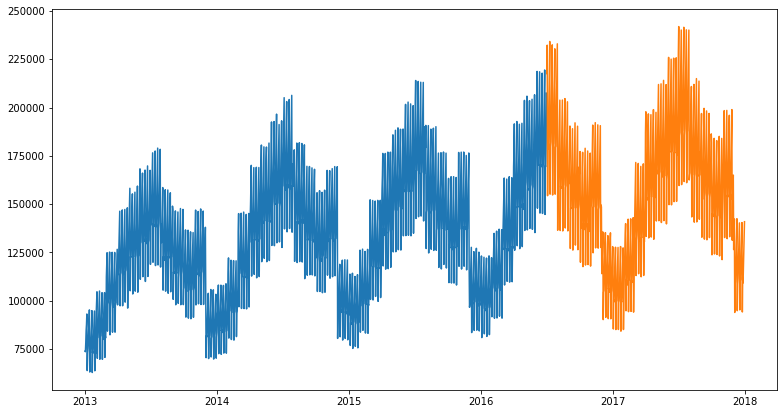

In [7]:
# Now its time to split the data
# splitting it precentage based

train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end


plt.plot(train.sales_total)
plt.plot(test.sales_total)


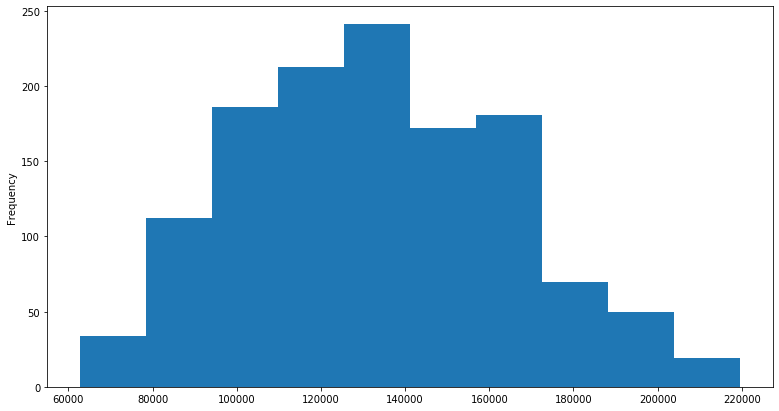

In [8]:
y = train.sales_total
y.plot.hist()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


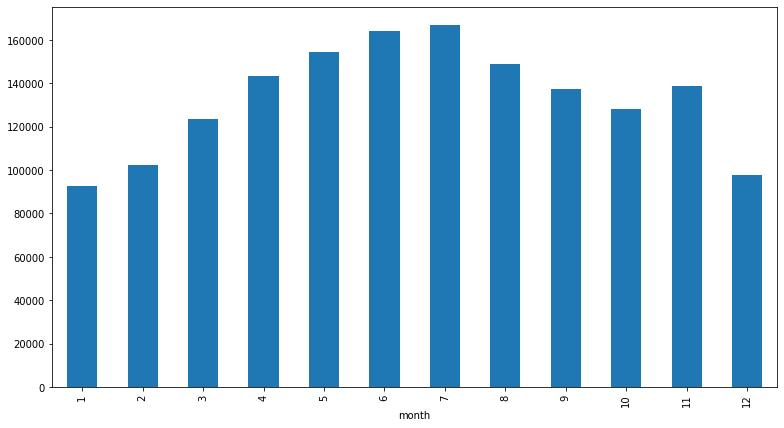

In [9]:
train['month'] = train.index.month

train.groupby('month').sales_total.mean().plot.bar()

In [10]:
train['weekday'] = train.index.day_name()
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,quantity,item_price,sales_total,year,month,weekday
sale_date,,,,,,
2013-01-01 00:00:00+00:00,13696.0,2580.2,73844.01,2013,1,Tuesday
2013-01-02 00:00:00+00:00,13678.0,2580.2,73570.58,2013,1,Wednesday
2013-01-03 00:00:00+00:00,14488.0,2580.2,78169.48,2013,1,Thursday
2013-01-04 00:00:00+00:00,15677.0,2580.2,84467.73,2013,1,Friday
2013-01-05 00:00:00+00:00,16237.0,2580.2,87621.85,2013,1,Saturday


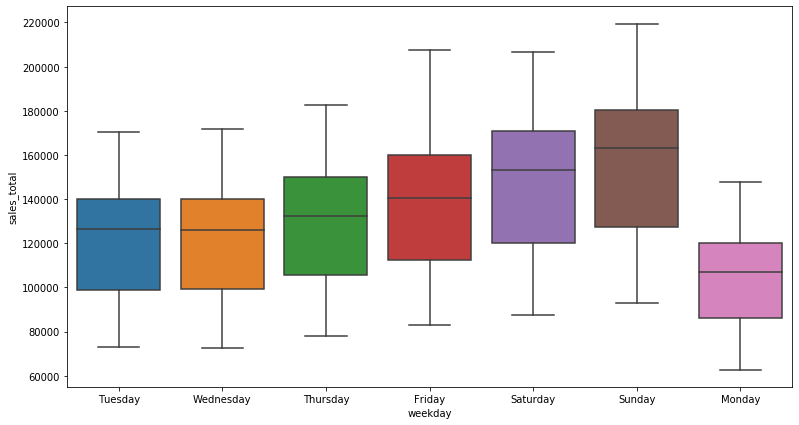

In [11]:
sns.boxplot(data=train, y='sales_total', x='weekday')

### 2 Week Average

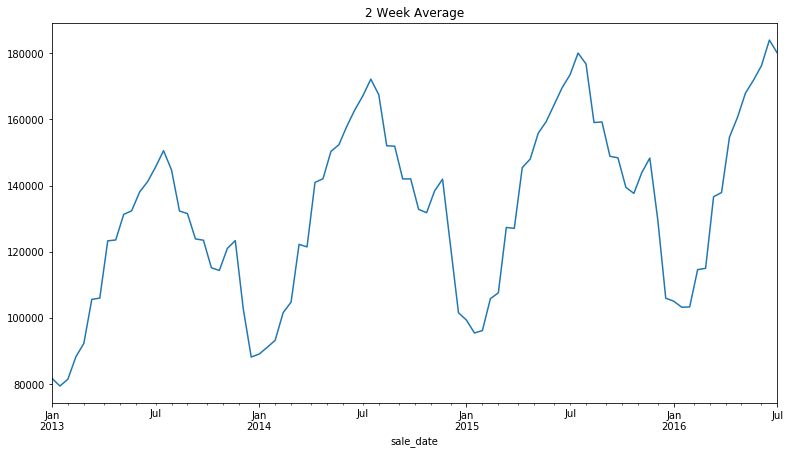

In [12]:
# looks alright... time to start plotting moving averages

#train.resample('2W').mean().plot(title='2 Week Average')
plt.figure(figsize=(13,7))
y.resample('2W').mean().plot(title='2 Week Average')

### Monthly Average


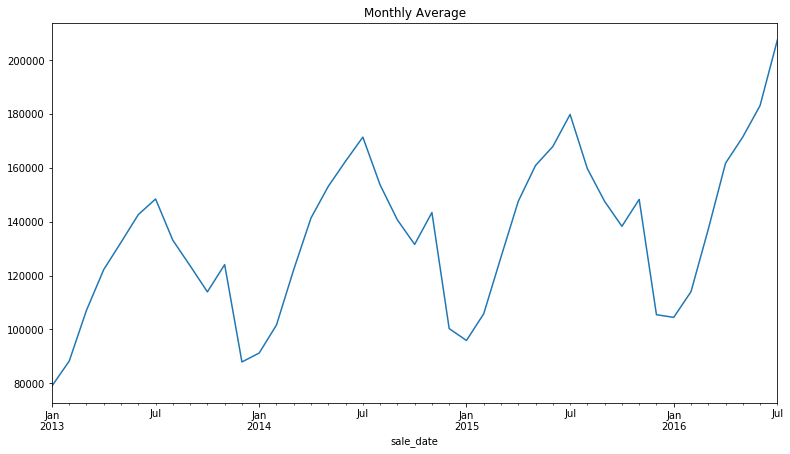

In [13]:
plt.figure(figsize=(13,7))
y.resample('M').mean().plot(title='Monthly Average')

### Min, Mean, and Max Plotted

<Figure size 936x504 with 0 Axes>

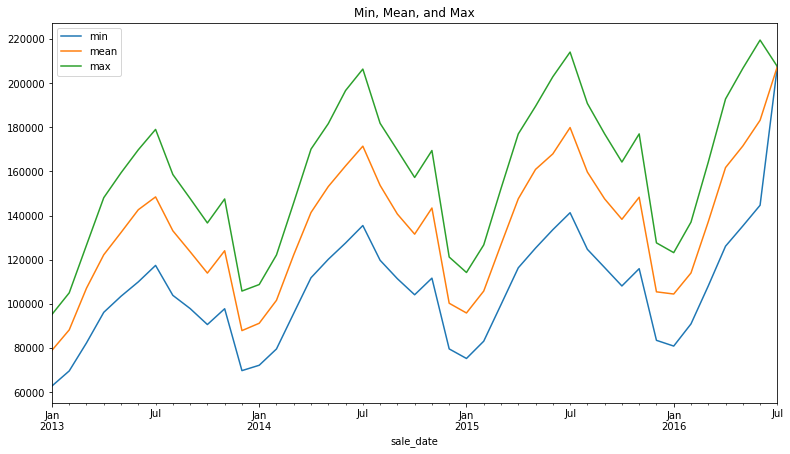

In [14]:
plt.figure(figsize=(13,7))
y.resample('M').agg(['min', 'mean', 'max']).plot(title='Min, Mean, and Max')

### Day, Week, Month, and Year Plotted (Average)

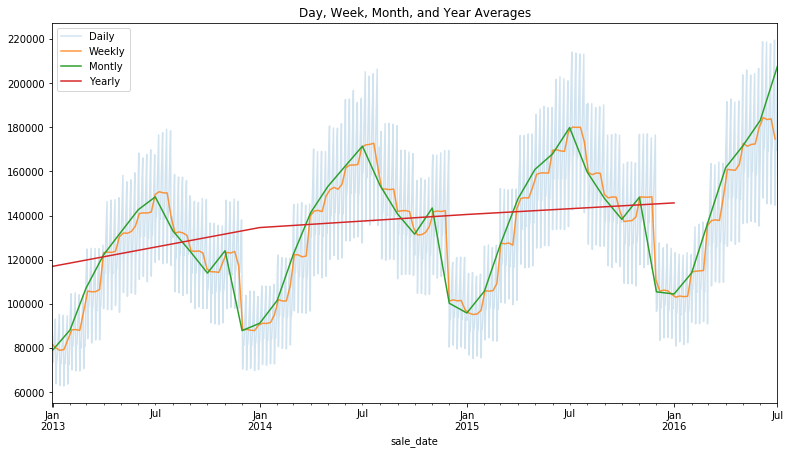

In [15]:
plt.figure(figsize=(13,7))
y.plot(alpha=.2, label='Daily', title='Day, Week, Month, and Year Averages')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

### 1, 3, and 7 Day rolling averages

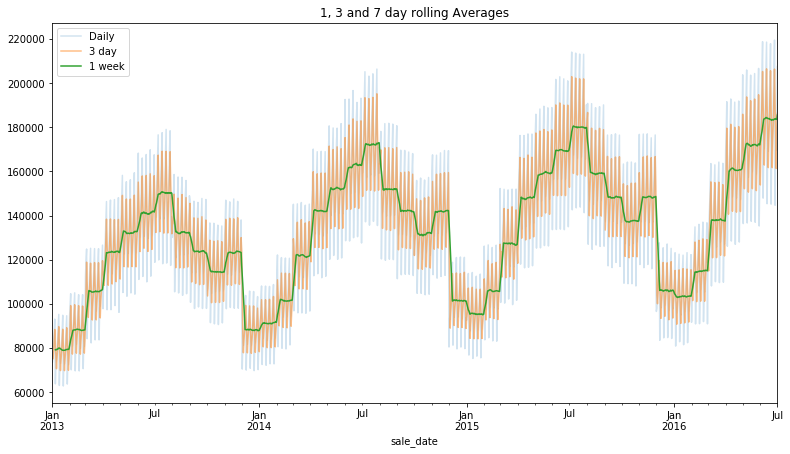

In [16]:
plt.figure(figsize=(13,7))
y.plot(alpha=.2, label='Daily', title='1, 3 and 7 day rolling Averages')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualizing change Week to Week

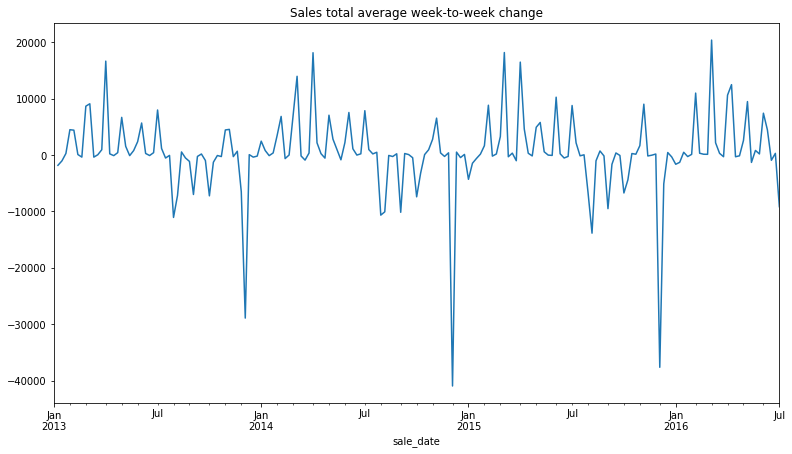

In [17]:
plt.figure(figsize=(13,7))
y.resample('W').mean().diff().plot(title='Sales total average week-to-week change')

### Visualizing change Daily

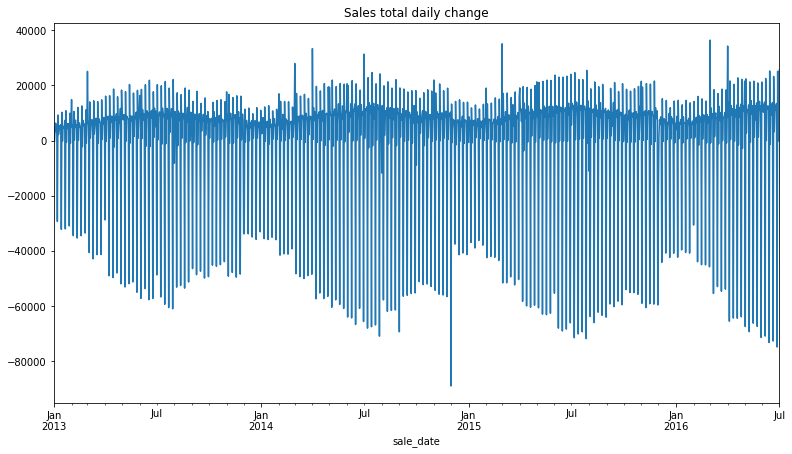

In [18]:
plt.figure(figsize=(13,7))
y.resample('D').mean().diff().plot(title='Sales total daily change')

### Visualizing change Monthly

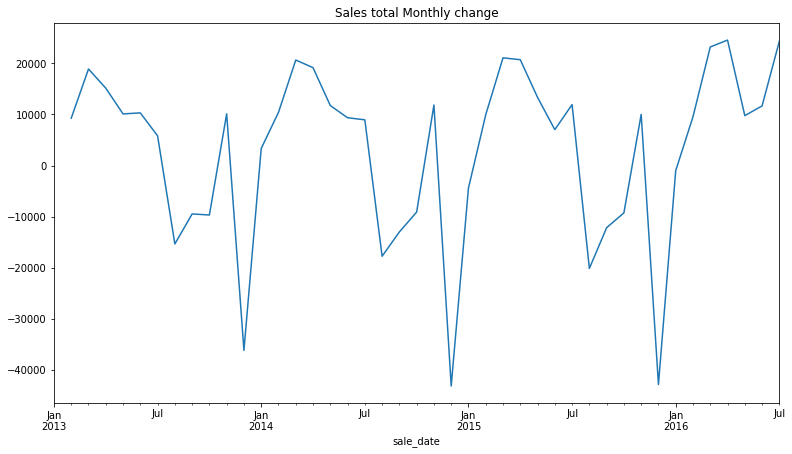

In [19]:
plt.figure(figsize=(13,7))
y.resample('M').mean().diff().plot(title='Sales total Monthly change')

### 'Tis the Season for Seasonal Plots

<Figure size 936x504 with 0 Axes>

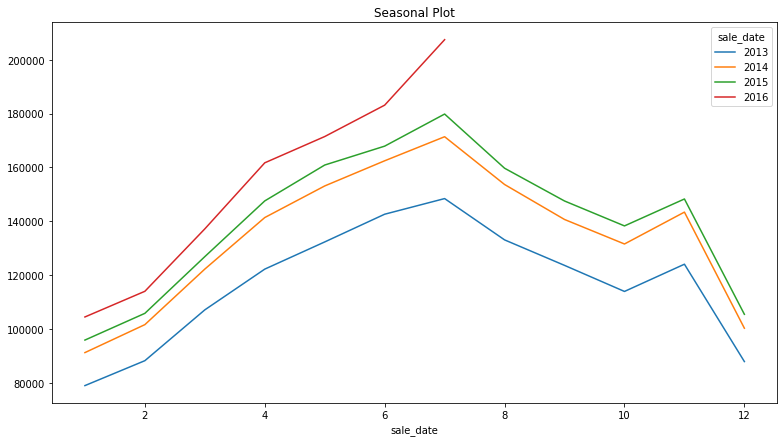

In [20]:
plt.figure(figsize=(13,7))
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

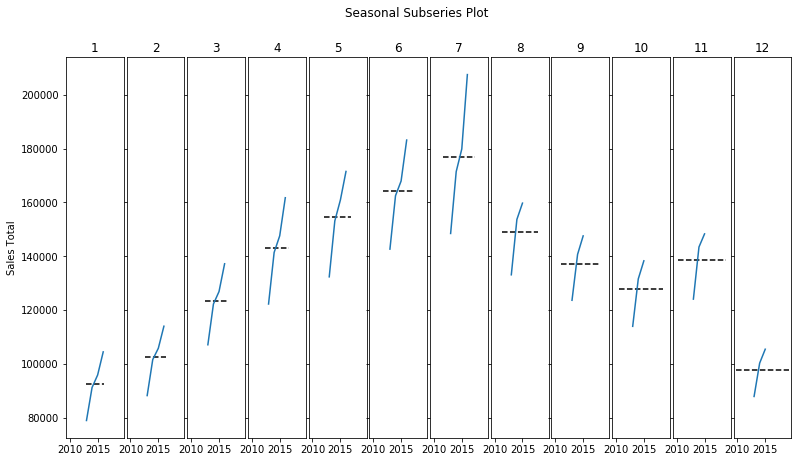

In [21]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

axs[0].set(ylabel='Sales Total')
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=.05)
# fig.tight_layout()

### Lag plots

Text(0.5, 1.0, 'Lag plot with lag=1')

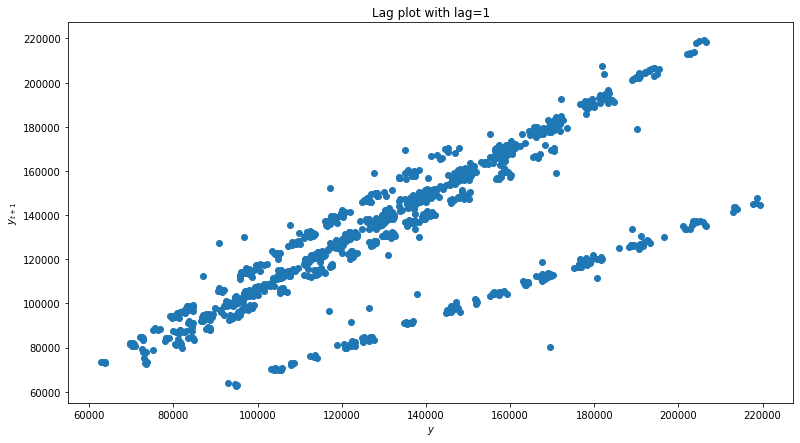

In [22]:
plt.figure(figsize=(13,7))
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

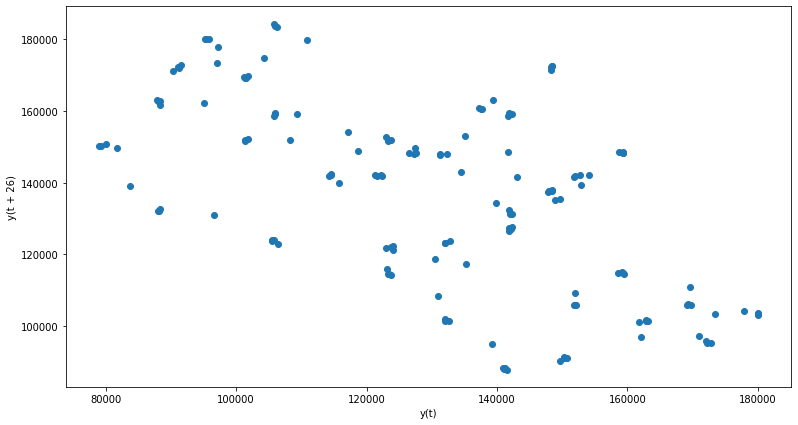

In [23]:
plt.figure(figsize=(13,7))
pd.plotting.lag_plot(y.resample('W').mean(), lag=26)

,quantity,item_price,this_week,year,month,half_a_year_later
sale_date,,,,,,
2013-01-06 00:00:00+00:00,15177.833333,2580.2,81794.583333,2013.0,1.000000,149604.697143
2013-01-13 00:00:00+00:00,14843.142857,2580.2,79990.601429,2013.0,1.000000,150789.424286
2013-01-20 00:00:00+00:00,14707.142857,2580.2,78973.360000,2013.0,1.000000,150282.567143
2013-01-27 00:00:00+00:00,14756.857143,2580.2,79272.691429,2013.0,1.000000,150242.265714
2013-02-03 00:00:00+00:00,15575.285714,2580.2,83792.507143,2013.0,1.428571,139188.128571
...,...,...,...,...,...,...
2016-06-05 00:00:00+00:00,33516.857143,2580.2,179882.295714,2016.0,5.714286,NaN
2016-06-12 00:00:00+00:00,34253.000000,2580.2,184381.464286,2016.0,6.000000,NaN
2016-06-19 00:00:00+00:00,34130.571429,2580.2,183473.044286,2016.0,6.000000,NaN


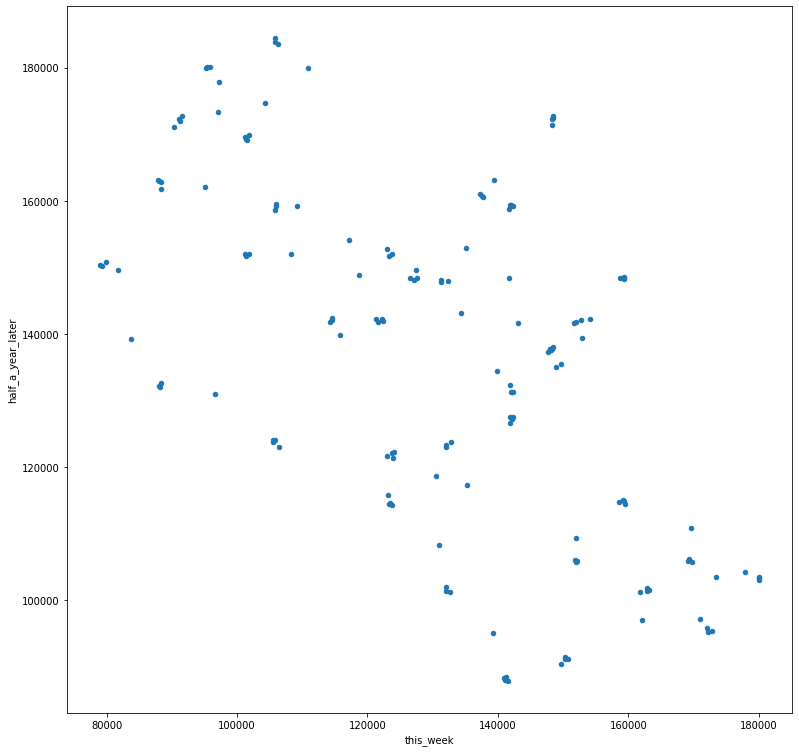

In [24]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.sales_total.shift(-26)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

In [25]:
train

,quantity,item_price,sales_total,year,month,weekday
sale_date,,,,,,
2013-01-01 00:00:00+00:00,13696.0,2580.2,73844.01,2013,1,Tuesday
2013-01-02 00:00:00+00:00,13678.0,2580.2,73570.58,2013,1,Wednesday
2013-01-03 00:00:00+00:00,14488.0,2580.2,78169.48,2013,1,Thursday
2013-01-04 00:00:00+00:00,15677.0,2580.2,84467.73,2013,1,Friday
2013-01-05 00:00:00+00:00,16237.0,2580.2,87621.85,2013,1,Saturday
...,...,...,...,...,...,...
2016-06-27 00:00:00+00:00,26884.0,2580.2,144659.61,2016,6,Monday
2016-06-28 00:00:00+00:00,31539.0,2580.2,169712.82,2016,6,Tuesday
2016-06-29 00:00:00+00:00,31638.0,2580.2,169512.50,2016,6,Wednesday


### Autocorrelation plot

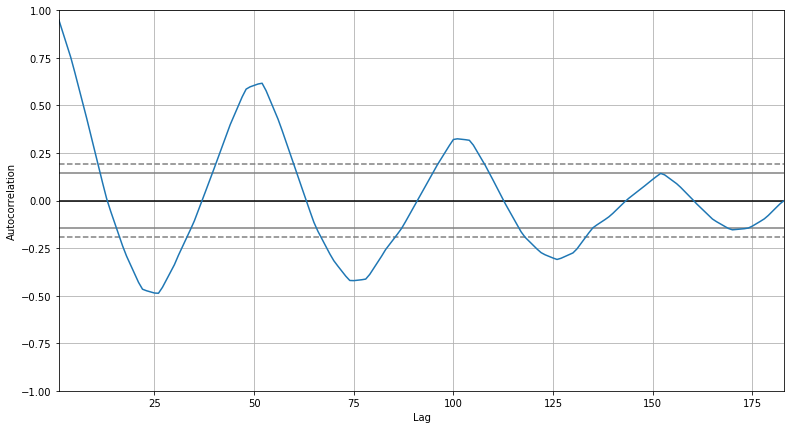

In [26]:
plt.figure(figsize=(13,7))
pd.plotting.autocorrelation_plot(y.resample('W').mean())

### Seasonal Decomposition

In [27]:
result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-01 00:00:00+00:00,73844.01,NaN,-10133.417056,NaN
2013-01-02 00:00:00+00:00,73570.58,NaN,-9983.500259,NaN
2013-01-03 00:00:00+00:00,78169.48,NaN,-1382.446605,NaN
2013-01-04 00:00:00+00:00,84467.73,79220.720000,7494.453462,-2247.443462
2013-01-05 00:00:00+00:00,87621.85,79099.384286,16295.763439,-7773.297724


<Figure size 936x504 with 0 Axes>

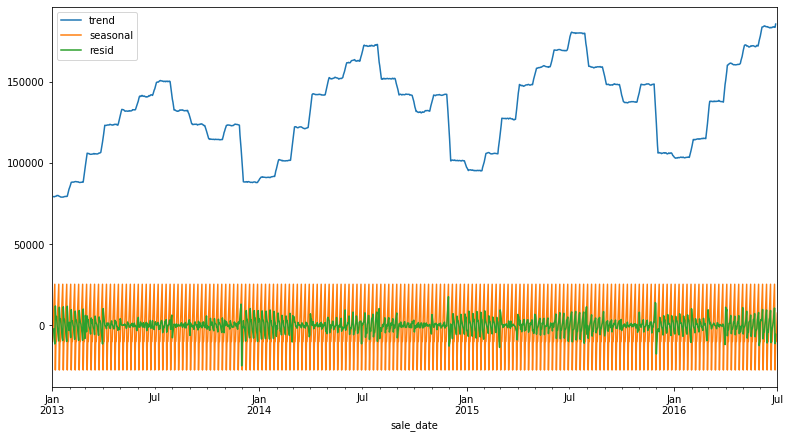

In [28]:
plt.figure(figsize=(13,7))
decomposition.iloc[:, 1:].plot()

<Figure size 936x504 with 0 Axes>

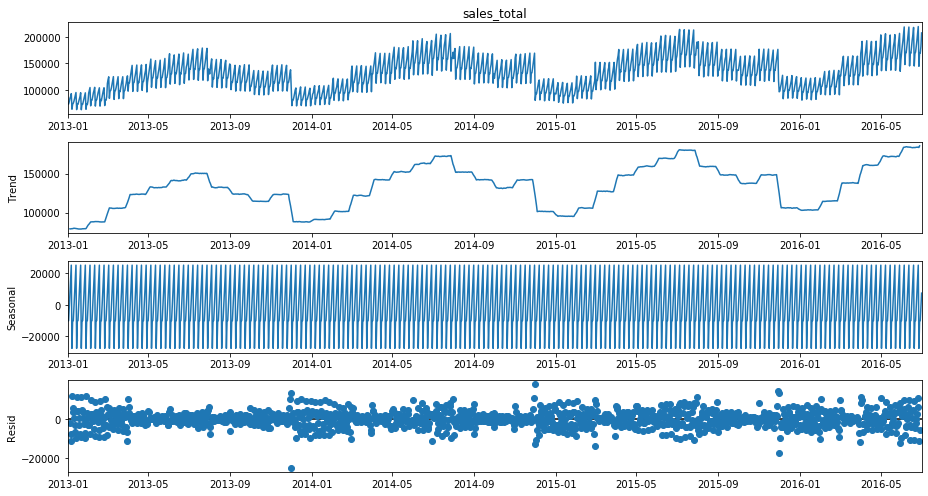

In [29]:
plt.figure(figsize=(13,7))
result.plot()
None

# Time for the OPSD Dataset

In [30]:
# acquire
plt.rc('figure', figsize=(13, 7))
df1 = opsd_germany_daily()
df1.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [31]:
# doing a lil prep

df1 = prepare.prep_opsd_data(df1)
df1

,consumption,wind,solar,wind_and_solar,month,year
date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,1,2006
2006-01-02,1380.52100,0.000,0.000,0.000,1,2006
2006-01-03,1442.53300,0.000,0.000,0.000,1,2006
2006-01-04,1457.21700,0.000,0.000,0.000,1,2006
2006-01-05,1477.13100,0.000,0.000,0.000,1,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,12,2017
2017-12-28,1299.86398,506.424,14.162,520.586,12,2017
2017-12-29,1295.08753,584.277,29.854,614.131,12,2017


### Time to split

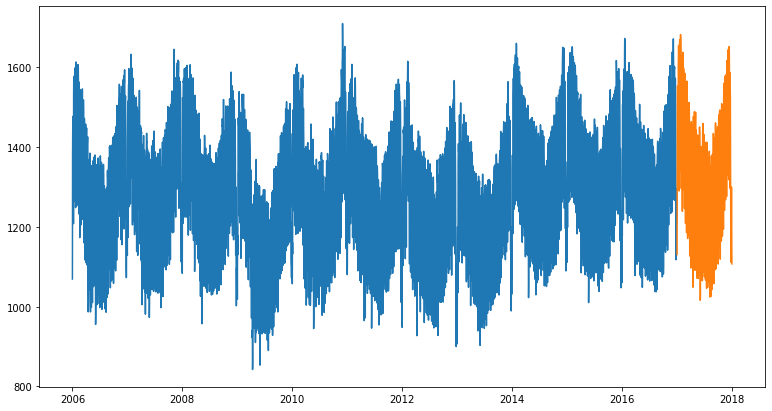

In [32]:
# Human Based this time (not like SAW)

train = df1[:'2016'] # includes 2016
test = df1['2017']

plt.plot(train.index, train.consumption)
plt.plot(test.index, test.consumption)


### Histograms

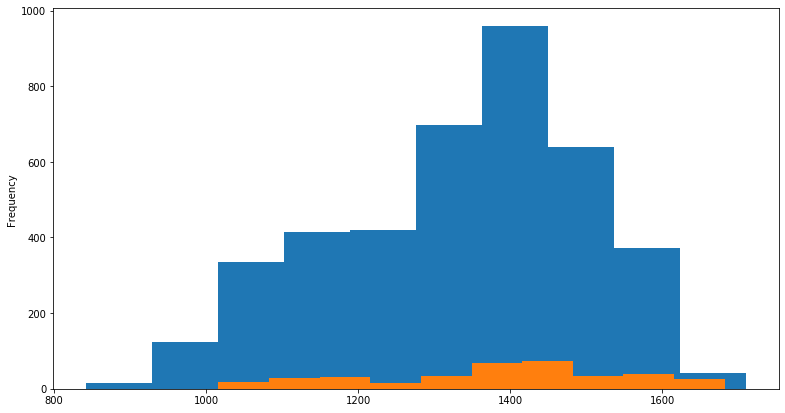

In [33]:
y1 = train.consumption
y1.plot.hist()
test.consumption.plot.hist()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


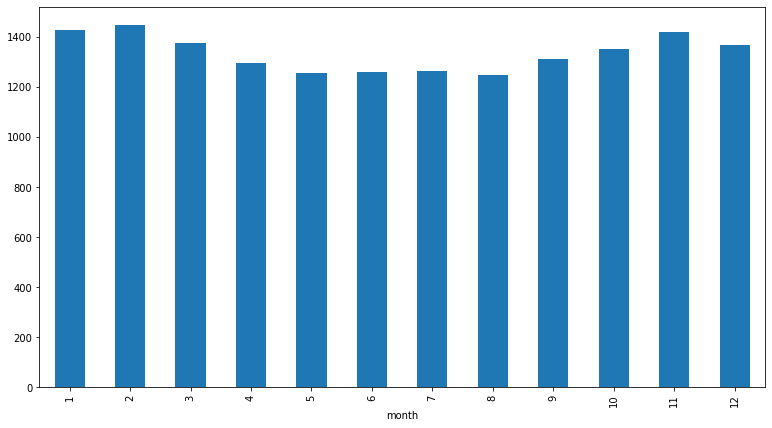

In [34]:
train['month'] = train.index.month

train.groupby('month').consumption.mean().plot.bar()

In [35]:
train['weekday'] = train.index.day_name()
train.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,consumption,wind,solar,wind_and_solar,month,year,weekday
date,,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,1,2006,Monday
2006-01-03,1442.533,0.0,0.0,0.0,1,2006,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,1,2006,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,1,2006,Thursday


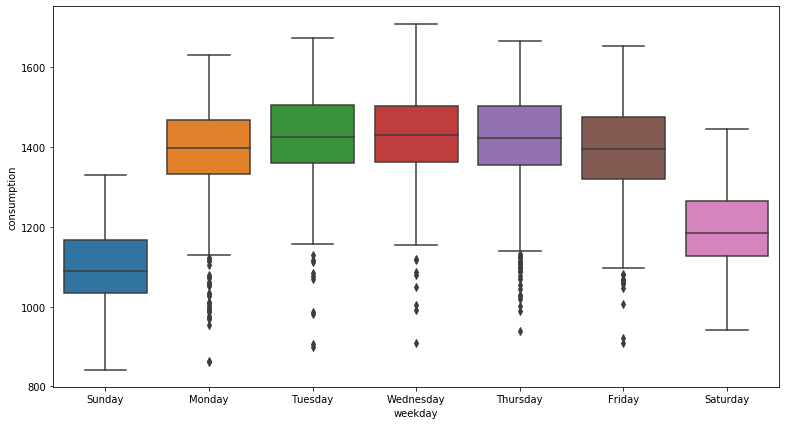

In [36]:
sns.boxplot(data=train, y='consumption', x='weekday')


### Visulaizing over time

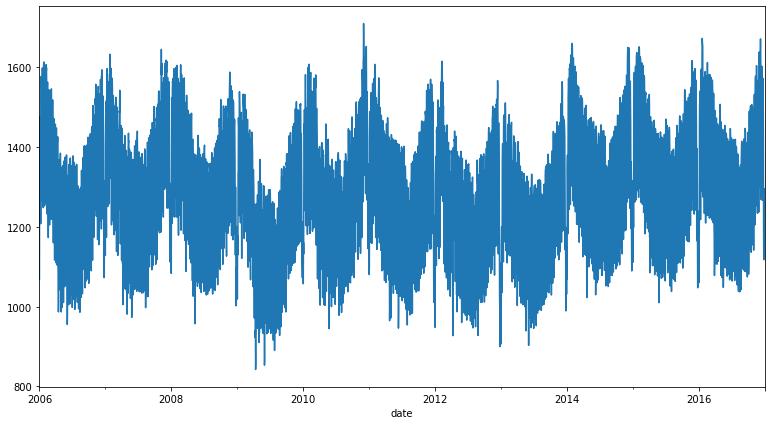

In [37]:
y1.plot()

### 2 Week Average

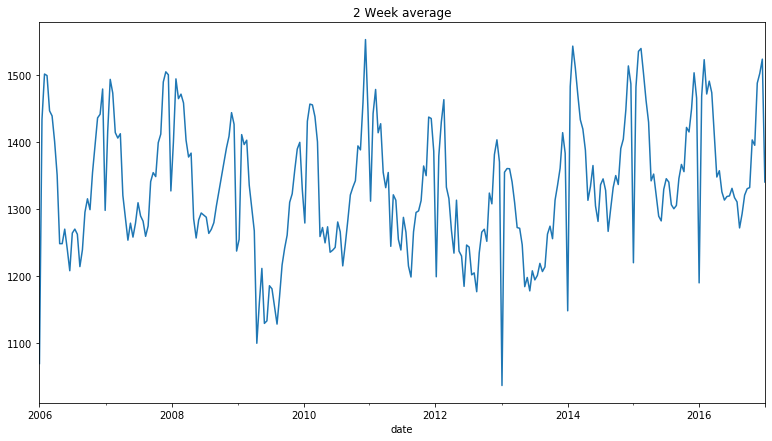

In [38]:
y1.resample('2W').mean().plot(title='2 Week average')

### Monthly Average

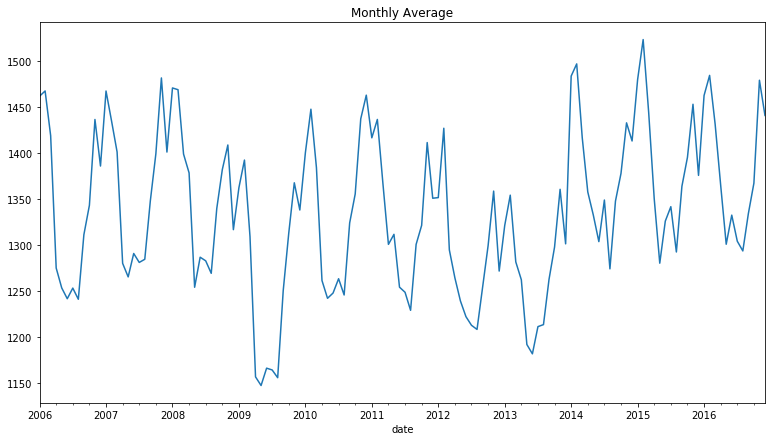

In [39]:
y1.resample('M').mean().plot(title='Monthly Average')

### Min, Mean, Max

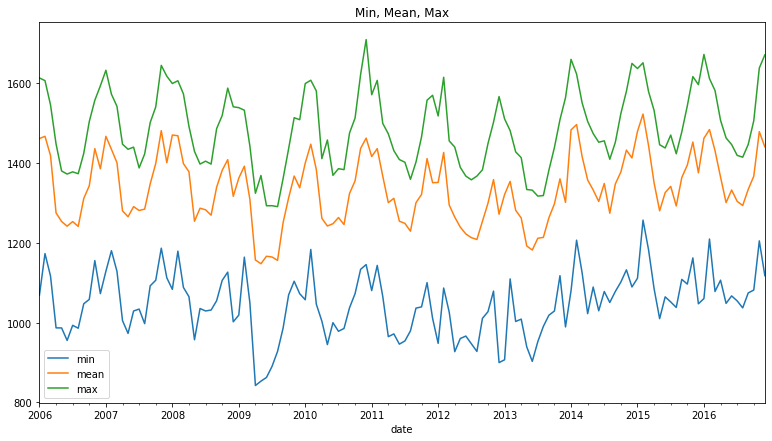

In [40]:
y1.resample('M').agg(['min', 'mean', 'max']).plot(title='Min, Mean, Max')

### Daily, Weekly, Monthly, Yearly

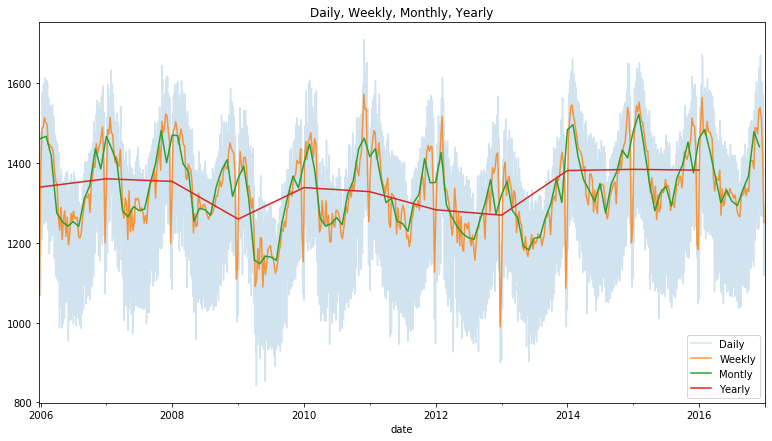

In [41]:
y1.plot(alpha=.2, label='Daily', title='Daily, Weekly, Monthly, Yearly')
y1.resample('W').mean().plot(alpha=.8, label='Weekly')
y1.resample('M').mean().plot(label='Montly')
y1.resample('Y').mean().plot(label='Yearly')
plt.legend()

### Daily, 3 day, and 7 day moving average

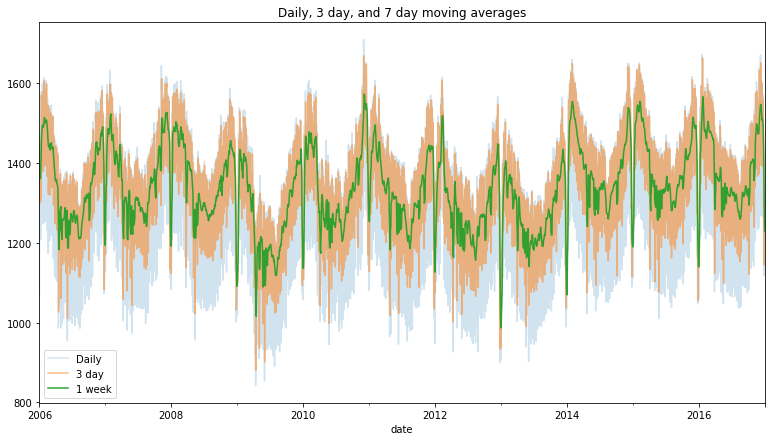

In [42]:
y1.plot(alpha=.2, label='Daily', title='Daily, 3 day, and 7 day moving averages')
y1.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y1.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualize change over time

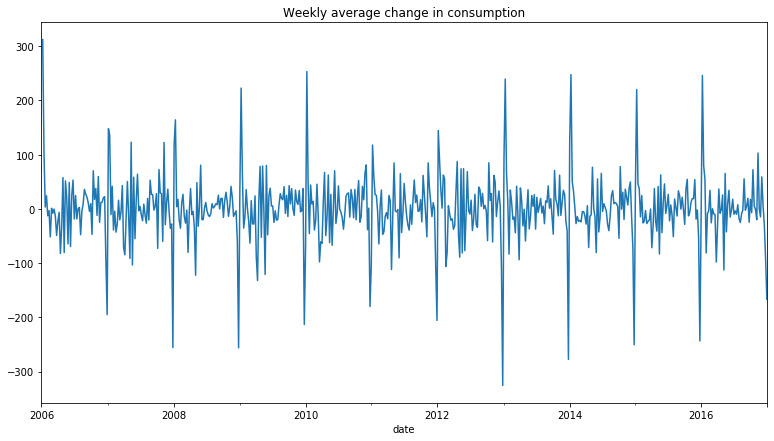

In [43]:
y1.resample('W').mean().diff().plot(title='Weekly average change in consumption')

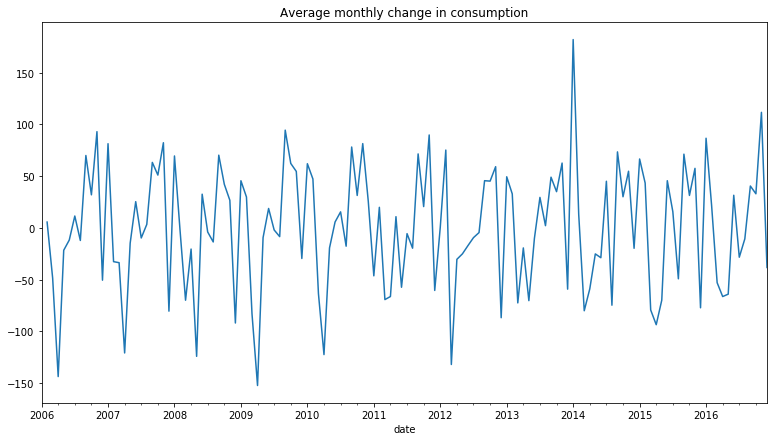

In [44]:
y1.resample('M').mean().diff().plot(title='Average monthly change in consumption')

### Seasonal Plot

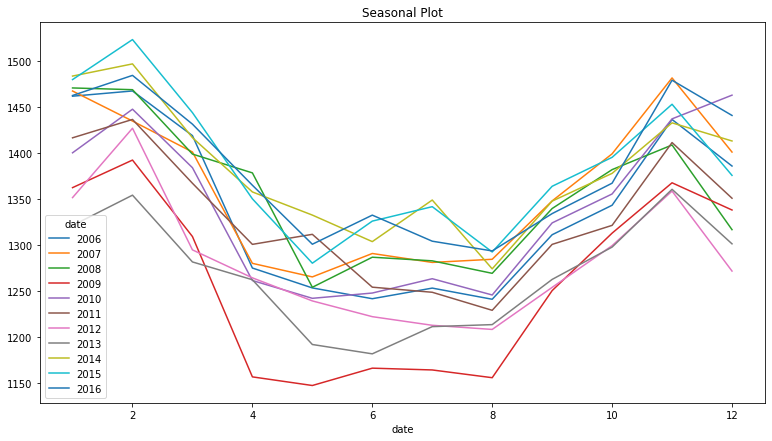

In [45]:
y1.groupby([y1.index.year, y1.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

### Season subseries plot

In [46]:
y1.groupby([y1.index.year, y1.index.month]).mean().unstack()

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2006,1461.442065,1467.106893,1418.649161,1275.058900,1253.488484,1241.781667,1253.296290,1241.188774,1311.169933,1343.161903,1436.164133,1385.686355
2007,1467.058032,1434.484357,1400.909871,1280.133167,1265.436000,1290.828733,1281.134258,1284.554355,1347.857500,1398.924581,1481.237600,1400.840161
2008,1470.373484,1468.486207,1398.653258,1378.243233,1254.194226,1286.797100,1282.866355,1269.323484,1339.615433,1381.788323,1408.506233,1316.669129
2009,1362.255613,1392.155179,1309.222387,1157.006367,1147.650742,1166.456833,1164.515871,1156.114645,1250.585967,1312.905000,1367.505100,1337.995581
2010,1400.041677,1447.322536,1383.865226,1261.505467,1242.220129,1247.938433,1263.467452,1245.832323,1324.003533,1355.390839,1436.854833,1462.556581
2011,1416.290581,1436.212607,1366.989516,1300.732300,1311.608290,1254.294333,1248.768194,1229.204935,1300.706833,1321.337484,1411.144733,1350.761871
2012,1351.441226,1426.666241,1294.748258,1264.427000,1239.388710,1222.315667,1212.953710,1208.466258,1254.097633,1299.330355,1358.505700,1271.769968
2013,1321.194935,1354.087429,1281.671581,1262.359967,1192.123032,1181.999000,1211.503484,1213.691355,1262.723900,1297.771387,1360.433367,1301.299645
2014,1483.261323,1496.465536,1416.458355,1357.582700,1332.490710,1303.712233,1348.810258,1274.170968,1347.642400,1377.754355,1432.526667,1412.856161


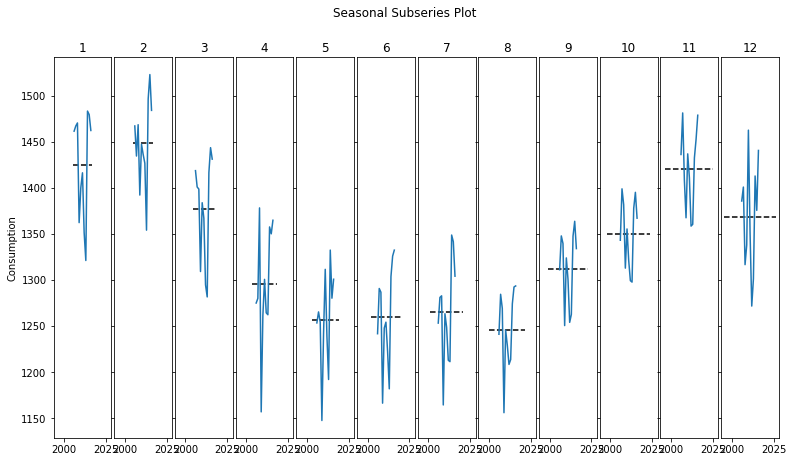

In [47]:
table = y1.groupby([y1.index.year, y1.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), ls='--')
    ax.set(xlabel='')

axs[0].set(ylabel='Consumption')
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=.05)
# fig.tight_layout()

### Lag Plot

Text(0.5, 1.0, 'Lag plot with lag=1')

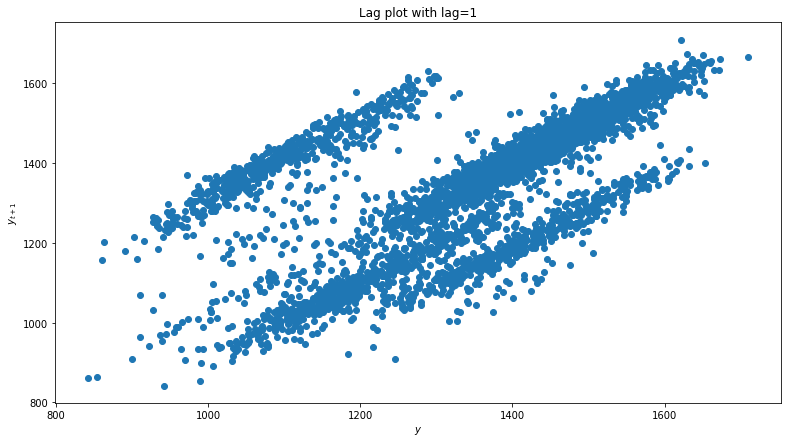

In [48]:
plt.scatter(y1, y1.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


[Text(0, 0.5, 't + 1'), Text(0.5, 0, 't')]

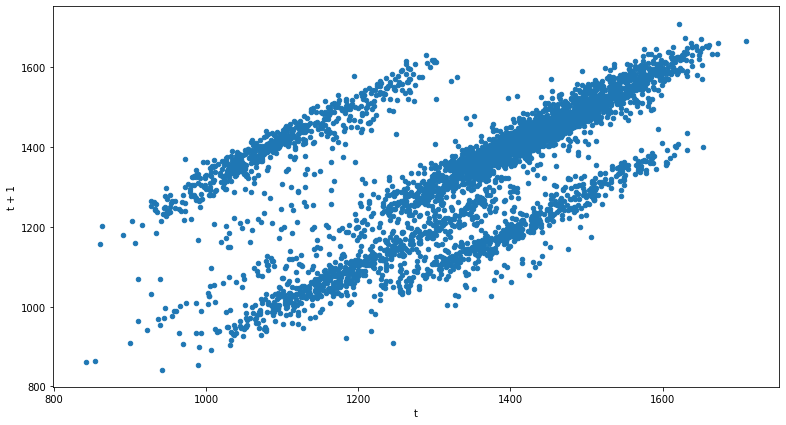

In [49]:
train['y(t + 1)'] = train.consumption.shift(-1)
ax = train.plot.scatter(x='consumption', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

In [50]:
del train['y(t + 1)']
del train['month']

,this_week,wind,solar,wind_and_solar,year,the_next_week
date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1501.403286
...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,2016.0,1538.948143
2016-12-11,1538.948143,334.445429,29.317000,363.762429,2016.0,1509.774000
2016-12-18,1509.774000,124.087286,17.804000,141.891286,2016.0,1417.620429


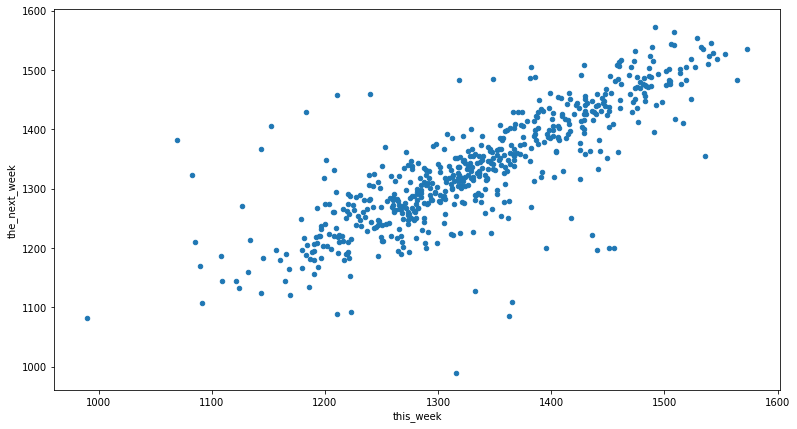

In [51]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.consumption.shift(-1)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

,this_week,wind,solar,wind_and_solar,year,12_weeks_out
date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1376.688714
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1354.122000
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1347.883429
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1265.716143
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1231.136143
...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,2016.0,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,2016.0,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,2016.0,NaN


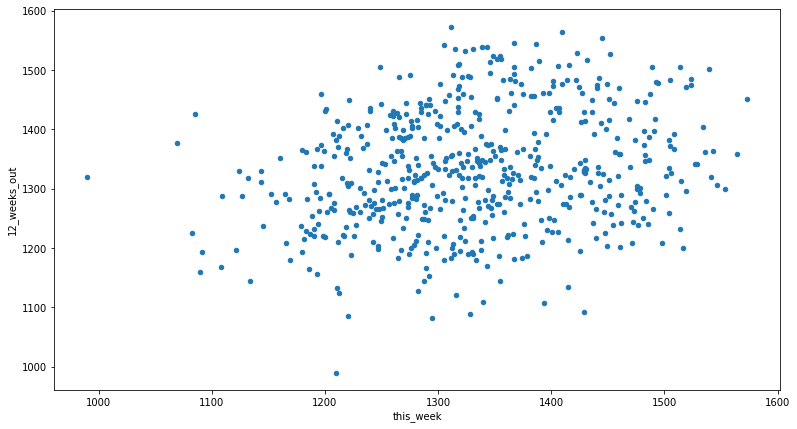

In [52]:
weekly = train.resample('W').mean()
weekly['12_weeks_out'] = weekly.consumption.shift(-12)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
weekly

,this_week,wind,solar,wind_and_solar,year,half_a_year_later
date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1254.896857
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1279.510571
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1260.945286
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1261.179714
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1263.756571
...,...,...,...,...,...,...
2016-12-04,1532.636714,295.015429,47.255000,342.270429,2016.0,NaN
2016-12-11,1538.948143,334.445429,29.317000,363.762429,2016.0,NaN
2016-12-18,1509.774000,124.087286,17.804000,141.891286,2016.0,NaN


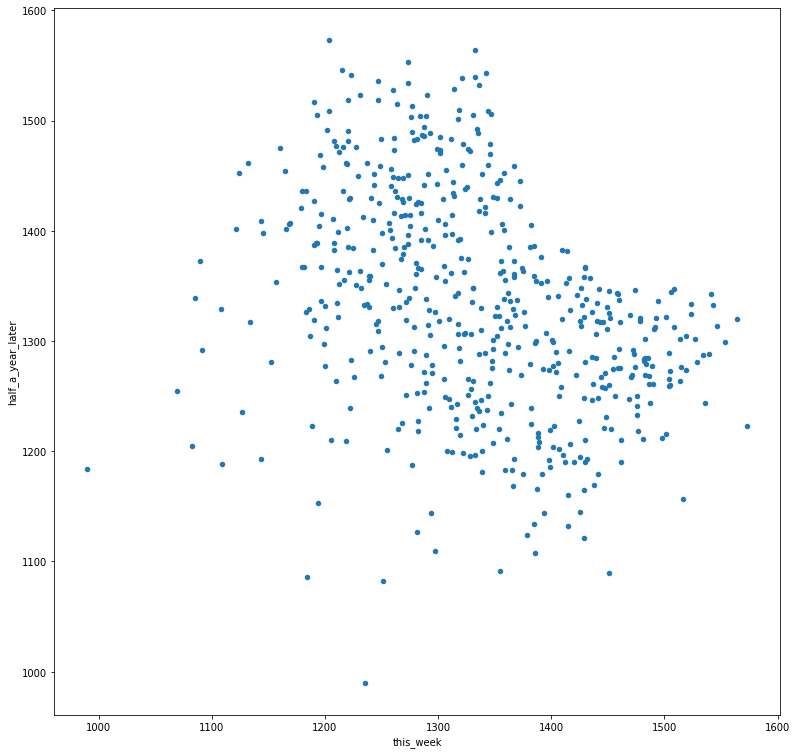

In [53]:
weekly = train.resample('W').mean()
weekly['half_a_year_later'] = weekly.consumption.shift(-26)
weekly = weekly.rename(columns={'consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='half_a_year_later', figsize=(13, 13))
weekly

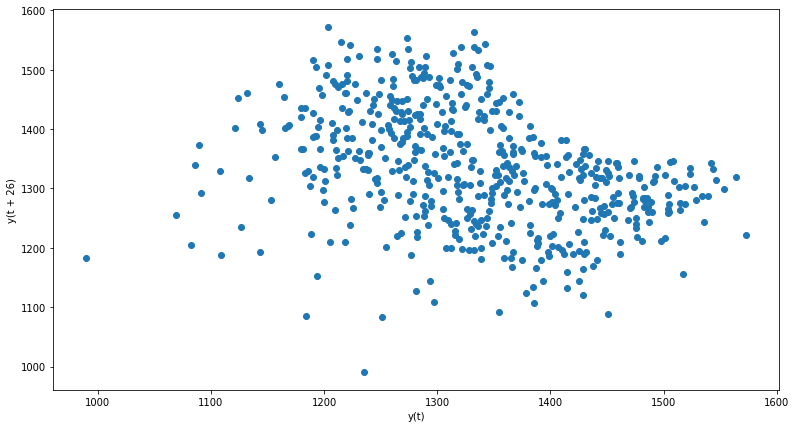

In [54]:
pd.plotting.lag_plot(train.consumption.resample('W').mean(), lag=26)


### Autocorrelation plot

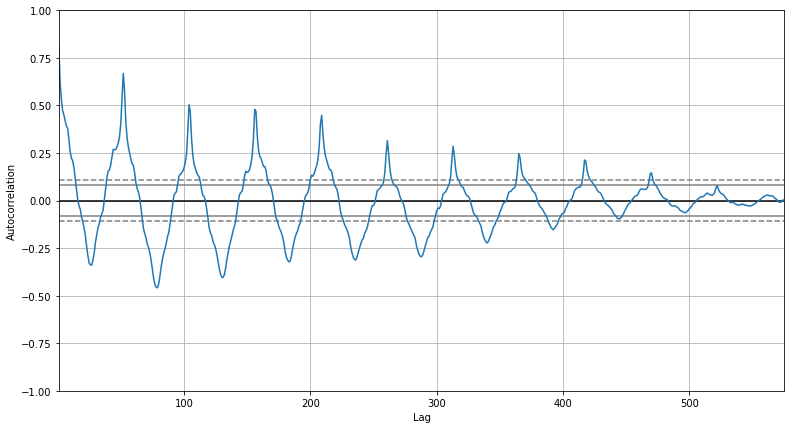

In [55]:
pd.plotting.autocorrelation_plot(train.consumption.resample('W').mean())


### Seasonal Composition

In [56]:
y1 = train.consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-01 00:00:00+00:00,73844.01,NaN,-10133.417056,NaN
2013-01-02 00:00:00+00:00,73570.58,NaN,-9983.500259,NaN
2013-01-03 00:00:00+00:00,78169.48,NaN,-1382.446605,NaN
2013-01-04 00:00:00+00:00,84467.73,79220.720000,7494.453462,-2247.443462
2013-01-05 00:00:00+00:00,87621.85,79099.384286,16295.763439,-7773.297724


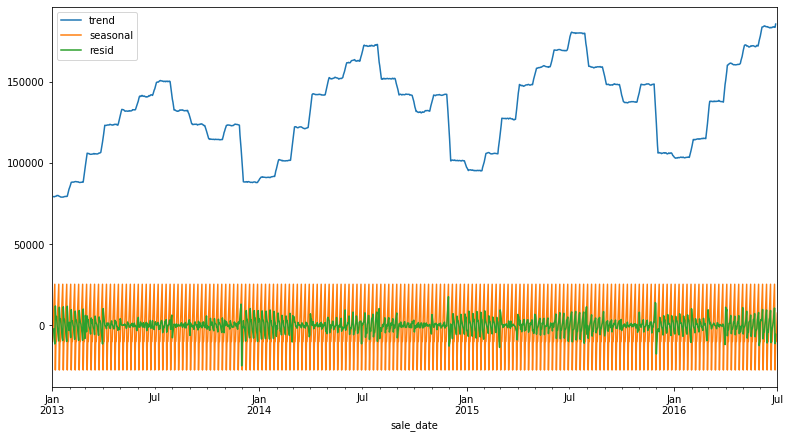

In [57]:
decomposition.iloc[:, 1:].plot()

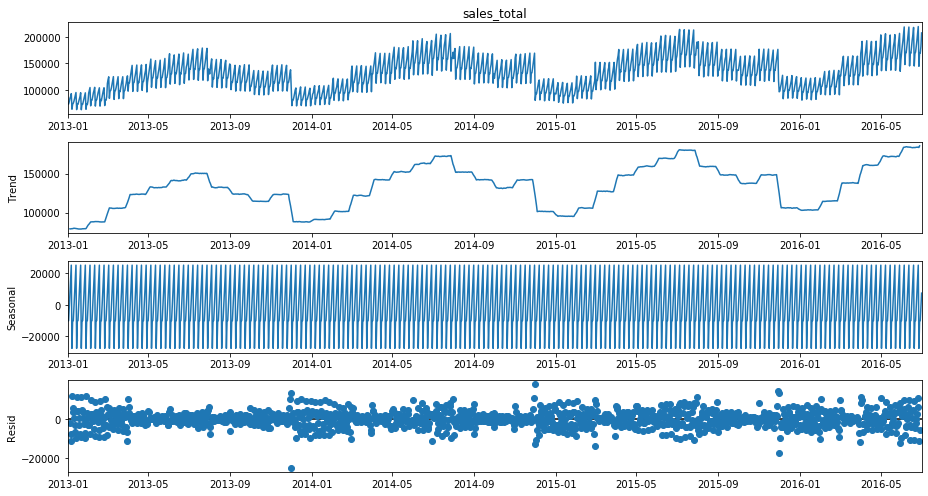

In [58]:
result.plot()
None